In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
from tqdm import tqdm

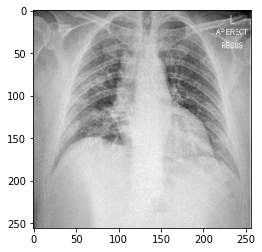

In [2]:
#File path to pet images
Dirpath = "mainfile"

lungscans = ["Covid", "normal_or_pneumonia"]

for lungscan in lungscans :
    #specifying the path 
    path = Dirpath+'/'+ lungscan
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
        #Plotting the image to show the picture
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        break
    break
    


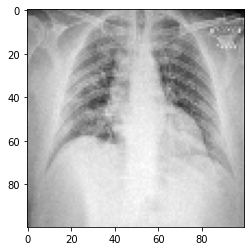

In [3]:
#all the pictures are not of the same size. 
#let us make the pictures of the same size because we don't want our model to consider the size of the picture while training.
size = 100
new_array = cv2.resize(img_array, (size,size))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [4]:
#This list will contain our training data
training_data = []

Dirpath = "mainfile"
animals = ["Covid", "normal_or_pneumonia"]
size = 100

#Thus function will create our training data
def create_training_data():
    for animal in animals:
        path = os.path.join(Dirpath,animal)
        animal_num = animals.index(animal)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (size,size))
                training_data.append([new_array, animal_num])
            except Exception:
                pass

create_training_data()

print("The number pictures in the training data is : " + str(len(training_data)))

100%|███████████████████████████████████████████████████████████████████████████████| 130/130 [00:00<00:00, 204.81it/s]

The number pictures in the training data is : 255


In [5]:
import random

#Lets shuffle the data 
random.shuffle(training_data)

In [6]:
X = []
y = []

#Seperating features and labels
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, size, size, 1)
#Lets the normalize x by dividing by 255 since it is a picture
X = X/255.0
y= np.array(y)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation


In [10]:
#Create the model
model = tf.keras.Sequential()
model.add(Conv2D(256, (3,3), input_shape = X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'] )

#don't run this on cpu only gpu
model.fit(X, y, batch_size=16, epochs=10, validation_split = 0.3)

Epoch 1/10
12/12 [==============================] - 1s 42ms/step - loss: 0.8928 - accuracy: 0.5393 - val_loss: 0.5530 - val_accuracy: 0.5455
Epoch 2/10
12/12 [==============================] - 0s 31ms/step - loss: 0.3766 - accuracy: 0.8483 - val_loss: 0.1323 - val_accuracy: 0.9481
Epoch 3/10
12/12 [==============================] - 0s 31ms/step - loss: 0.0806 - accuracy: 0.9831 - val_loss: 0.0810 - val_accuracy: 0.9610
Epoch 4/10
12/12 [==============================] - 0s 31ms/step - loss: 0.0534 - accuracy: 0.9663 - val_loss: 0.1118 - val_accuracy: 0.9740
Epoch 5/10
12/12 [==============================] - 0s 31ms/step - loss: 0.0406 - accuracy: 0.9888 - val_loss: 0.1444 - val_accuracy: 0.9610
Epoch 6/10
12/12 [==============================] - 0s 31ms/step - loss: 0.0584 - accuracy: 0.9831 - val_loss: 0.1282 - val_accuracy: 0.9481
Epoch 7/10
12/12 [==============================] - 0s 30ms/step - loss: 0.0758 - accuracy: 0.9551 - val_loss: 0.1266 - val_accuracy: 0.9351
Epoch 8/10
12

In [ ]:
#our model has acheived 97 percent accuracy